# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier



>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [3]:
# Load pickled data
import pickle

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
print ('Data loaded')

Data loaded


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of valid examples=", X_valid.shape[0])
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of valid examples= 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [5]:
### Data exploration visualization
import matplotlib.pyplot as plt
import csv

%matplotlib inline
figsize_default = plt.rcParams['figure.figsize']

In [6]:
# maps from class index into human readable text
signname = {}
with open('signnames.csv', 'r') as f:
    reader = csv.reader(f)
    for r in reader:
        if r[0].isdigit():
            signname[int(r[0])] = r[1]
NCLASS = len(signname)

In [7]:
def view(img, label=None):
    """plot the image (RGB or gray)"""
    if label:
        print(signname[label])
    if len(img.shape) == 3 and img.shape[2] == 3:
        plt.imshow(img)
    else:
        plt.imshow(img.squeeze(), cmap='gray')

In [8]:
def samples_stat(features, labels):
    """return the histogram of labels and a map mapping from label to one image"""
    h = [0 for i in range(NCLASS)]
    samples = {}
    for idx, l in enumerate(labels):
        h[l] += 1
        if l not in samples:
            samples[l] = features[idx]
    return h, samples

In [10]:
###plot images with stat
def explore(features, labels):
    "Functions to explore the given data set"
    plt.rcParams['figure.figsize'] = (20.0, 20.0)
    histo, samples = samples_stat(features, labels)
    total_class = len(set(labels))
    ncols = 4
    nrows = 11

    print("total tests {}. total labels: {}".format(len(features), total_class))
    _, axes = plt.subplots(nrows=nrows, ncols=ncols)

    class_idx = 0
    for r in range(nrows):
        for c in range(ncols):
            a = axes[r][c]
            a.axis('off')
            if class_idx in samples:
                a.imshow(samples[class_idx])
            if class_idx in signname:
                a.set_title("No.{} {}(#{})".format(class_idx, signname[class_idx], histo[class_idx]), fontsize=12)
            class_idx += 1
    plt.rcParams['figure.figsize'] = figsize_default

total tests 34799. total labels: 43


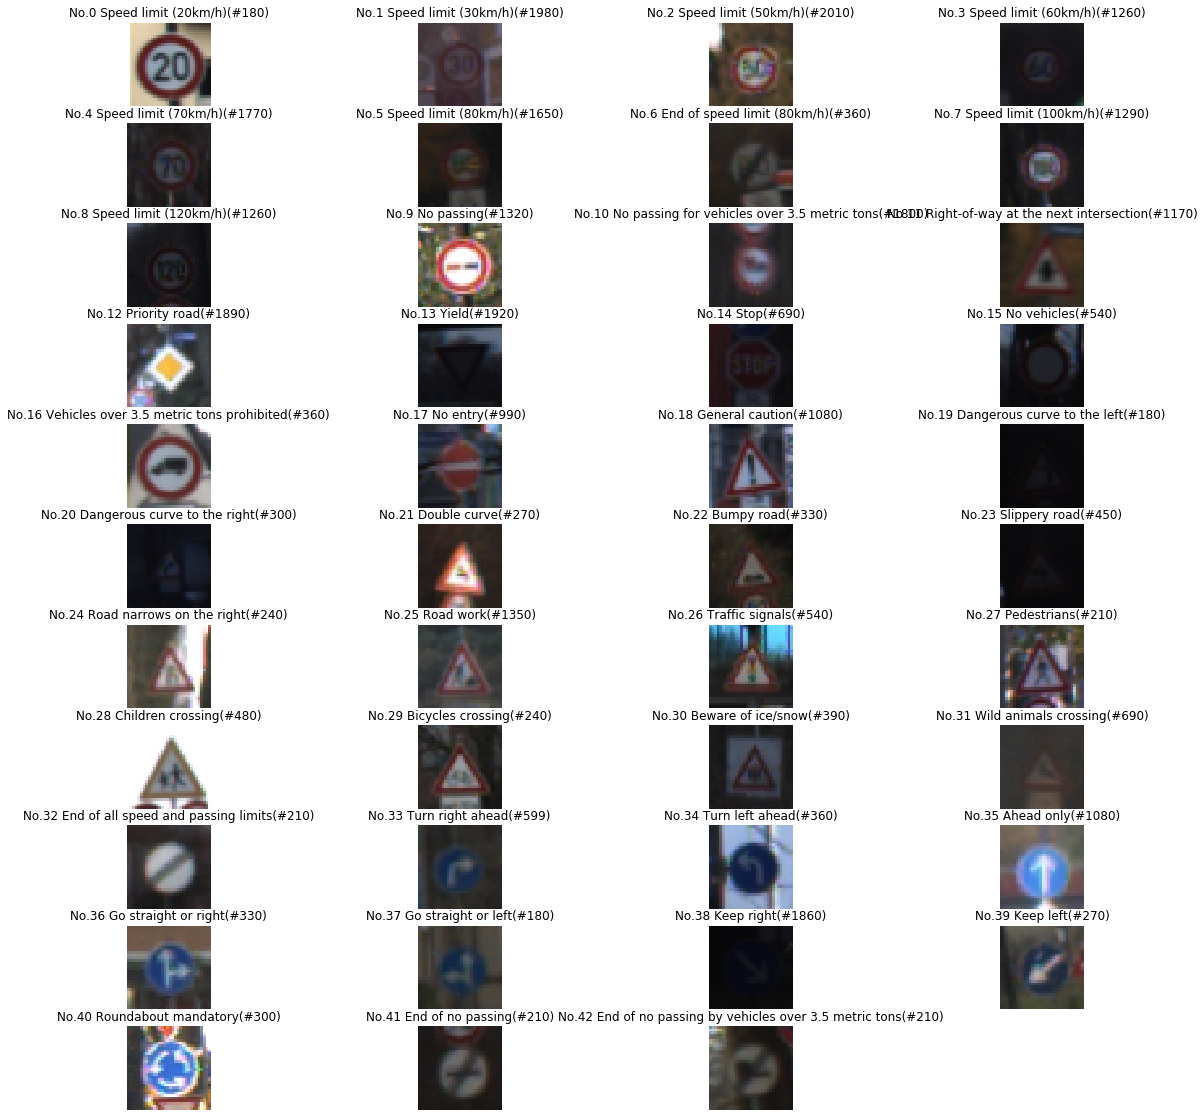

In [11]:
explore(X_train, y_train)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [12]:
### Preprocess images: normalize images from [0,255] to [0,1], and gray scale it
### Rationale: although colors in the traffic sign are important in real world for people to recoganize
###            different signs, traffic signs are also different in their shapes and contents. We can
###            ignore colors in this problem because signs in our training set are differentiable from
###            their contents and shapes.
import numpy as np
import cv2

def reshape_raw_images(imgs):
    """Given 4D images (number, heigh, weight, channel), this
    function grayscales and returns (number, height, weight, 1) images"""
    def gray(src):
        if src.dtype == np.uint8:
            src = np.array(src/255.0, dtype=np.float32)
        dst = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
        return dst.reshape(32,32,1)
    norms = [gray(img) for img in imgs]
    return np.array(norms)
    
features_train = reshape_raw_images(X_train)
labels_train   = y_train

features_valid = reshape_raw_images(X_valid)
labels_valid   = y_valid

features_test  = reshape_raw_images(X_test)
labels_test    = y_test

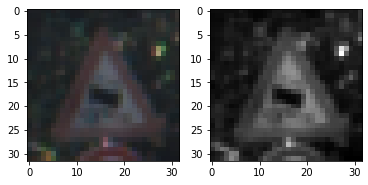

In [13]:
_, vframes = plt.subplots(nrows=1, ncols=2)
vframes[0].imshow(X_train[2000])
vframes[1].imshow(features_train[2000].squeeze(), cmap='gray')

### Model Architecture

In [14]:
### Architecture:
###   I adapted LeNet architecture: Two convolutional layers followed by one flatten layer and three
###   fully connected linear layers.
###
###   convolution 1: 32x32x1  -> 28x28x12 -> relu -> 14x14x12 (pooling)
###   convolution 2: 14x14x12 -> 10x10x25 -> relu -> 5x5x25   (pooling)
###         flatten: 5x5x25   -> 625
###        drop out: 625      -> 625
###          linear: 625      -> 300
###          linear: 300      -> 150
###          linear: 150      -> 43

### Experiment shows that
### 1. drop out has positive impact on the accuracy
### 2. longer depth (to some extent) on convolution filter has better accuracy

import tensorflow as tf

mu, sigma = 0, 0.1

def conv(input, in_len, in_depth, out_len, out_depth):
    """ Define a convolutional network layer
    @param input: input data or model
    @param in_len: 0D, the input height and width (assume they're the same)
    @param in_depth: 0D, the input depth (e.g. 3 for RGB images)
    @param out_len: 0D, desired output height and width
    @param out_depth: 0D, desired output depth
    """
    filter_len = in_len - out_len + 1
    # we're not going to use stride to reduce the dimention,
    # we're going to use pooling instead.
    strides = [1,1,1,1]

    W = tf.Variable(tf.truncated_normal(shape=(filter_len, filter_len, in_depth, out_depth), \
                                        mean = mu, stddev = sigma))
    b = tf.Variable(tf.zeros(out_depth))
    model = tf.nn.conv2d(input, W, strides=strides, padding='VALID') + b
    return model

def linear(input, in_size, out_size):
    W = tf.Variable(tf.truncated_normal(shape=(in_size, out_size), \
                                        mean=mu, stddev = sigma))
    b = tf.Variable(tf.zeros(out_size))
    model = tf.matmul(input, W) + b
    return model
    
def classifier(input, keep_prob):
    ## Layer1
    # convolution layer: 32x32x1 -> 28x28x12
    conv1 = conv(input, 32, 1, 28, 12)
    conv1 = tf.nn.relu(conv1)
    # pooling: 28x28x12 -> 14x14x12
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    ## Layer2
    # convolution layer 14x14x12 -> 10x10x25
    conv2 = conv(conv1, 14, 12, 10, 25)
    conv2 = tf.nn.relu(conv2)
    # pooling: 10x10x25 -> 5x5x25
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    ## Layer3
    # -> 625
    flat = tf.contrib.layers.flatten(conv2)
    dropped = tf.nn.dropout(flat, keep_prob)
    layer3 = linear(dropped, 625, 300)
    layer3 = tf.nn.relu(layer3)
    
    ## Layer4
    layer4 = linear(layer3, 300, 100)
    layer4 = tf.nn.relu(layer4)
    
    ## Layer 5
    layer5 = linear(layer4, 100, n_classes)
    return layer5
    

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [15]:
### Define the model and its input

from sklearn.utils import shuffle

feature_shape = features_train.shape[1:]
x = tf.placeholder(tf.float32, shape=(None,)+feature_shape)
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
# drop out layer parameter. This parameter should be 1.0 when evaluate and test
# the model, less than 1.0 when training
keep_prob = tf.placeholder(tf.float32)

logits = classifier(x, keep_prob)

Instructions for updating:
Colocations handled automatically by placer.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
# A function for evaluating the accuracy of a model
prediction_step = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuary_step = tf.reduce_mean(tf.cast(prediction_step, tf.float32))
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuary_step, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [17]:
import time

saver = tf.train.Saver()
model_file = './model'

In [18]:
### training
### Training the model use adam optimizer to minimize the cross entropy (loss)
from sklearn.model_selection import train_test_split

# Define training parameters
epoch = 10
batch_size = 64
rate = 0.001

# Training pipepline
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss = tf.reduce_mean(cross_entropy)
train_step  = tf.train.AdamOptimizer(learning_rate=rate).minimize(loss)

# Starts training
def train(X_data, y_data):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        print("starting ...")
        for i in range(epoch):
            X_train, X_tst, y_train, y_tst = train_test_split(X_data, y_data, test_size=0.1, random_state=int(time.time()))
            begin_time = time.time()
            for offset in range(0, len(X_train), batch_size):
                end = offset + batch_size
                features, labels = X_train[offset:end], y_train[offset:end]
                sess.run(train_step, feed_dict={x : features, y : labels, keep_prob: 0.8})
            validation = evaluate(X_tst, y_tst)
            print("[{3:.1f}s] epoch {0}/{1}: validation = {2:.3f}".format(i+1, epoch, validation, time.time()-begin_time))

        saver.save(sess, model_file);
        print("model saved into {}".format(model_file))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [19]:
# train
train(features_train, labels_train)


starting ...
[20.5s] epoch 1/10: validation = 0.864
[20.4s] epoch 2/10: validation = 0.953
[20.3s] epoch 3/10: validation = 0.974
[20.3s] epoch 4/10: validation = 0.984
[20.3s] epoch 5/10: validation = 0.983
[20.3s] epoch 6/10: validation = 0.990
[20.3s] epoch 7/10: validation = 0.995
[20.3s] epoch 8/10: validation = 0.984
[20.3s] epoch 9/10: validation = 0.991
[20.3s] epoch 10/10: validation = 0.993
model saved into ./model


In [20]:
# evaluate the validate set
with tf.Session() as sess:
    saver.restore(sess, model_file)
    acc = evaluate(features_valid, labels_valid)
    print("accuracy in validation set: {:.3f}".format(acc))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./model
accuracy in validation set: 0.929


In [21]:
# test
with tf.Session() as sess:
    saver.restore(sess, model_file)
    acc = evaluate(features_test, labels_test)
    print("accuracy in test set: ", acc)

INFO:tensorflow:Restoring parameters from ./model
accuracy in test set:  0.9208234362534277


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [22]:
### Images are found on Wikipedia. All images are clean and noise-free.
### The classifier is expected to behave correctly on most of them.

### Some interesting notes:
### I want to see how the classifier performs for similar signs
###   the General Caution and Traffic signals: they look a vertical bar (see below)
###   Pedestrains and Child crossing
###   Pedestrains and Wild animals crossing
from PIL import Image
import os

def read_file_to_32x32_array(file):
    x = Image.open(file).convert("RGB")
    x = x.resize((32,32))
    return np.array(x)

folder = "mydata"
files = [f for f in os.listdir(folder) if f.endswith("png") or f.endswith("jpg")]
paths = [os.path.join(folder, f) for f in files]
my_labels = [int(f.split('.')[0]) for f in files]

my_images = np.array([read_file_to_32x32_array(f) for f in paths])

total tests 11. total labels: 11


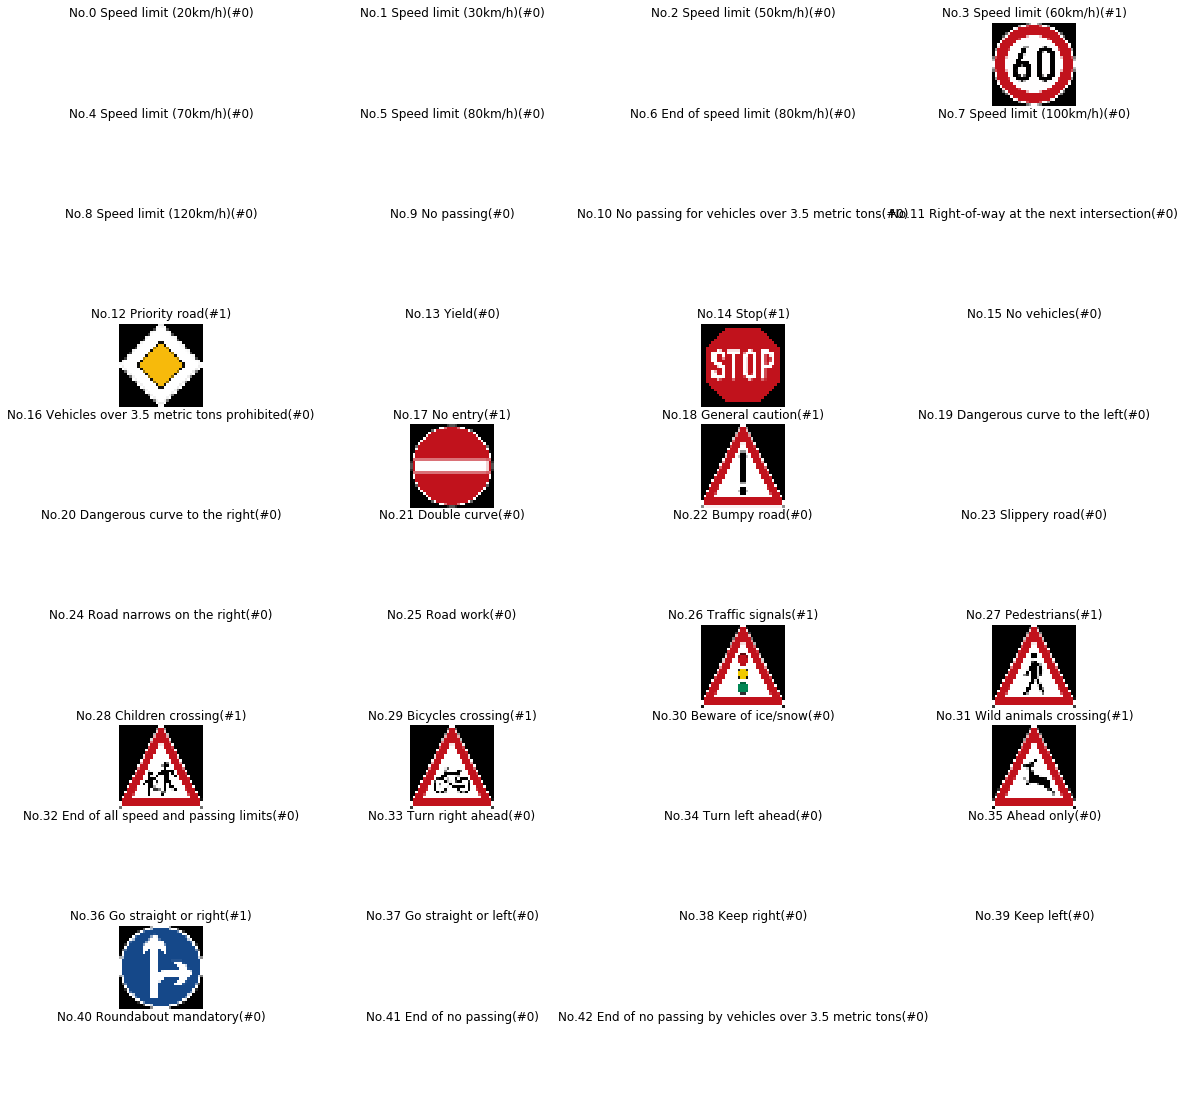

In [23]:
explore(my_images, my_labels)

### Predict the Sign Type for Each Image

In [24]:
# preprocess images
my_features = reshape_raw_images(my_images)

# Here is a function to predict images and output human readable sign names
def predict(features, human_readable=False):
    with tf.Session() as sess:
        saver.restore(sess, model_file)
        results = sess.run(tf.argmax(logits, 1), {x : features, keep_prob:1.0})
        if human_readable:
            results = [signname[n] for n in results]
        return results

In [25]:
predict(my_features, True)

INFO:tensorflow:Restoring parameters from ./model


['Right-of-way at the next intersection',
 'Bicycles crossing',
 'General caution',
 'Right-of-way at the next intersection',
 'Stop',
 'Speed limit (50km/h)',
 'Priority road',
 'Go straight or right',
 'Traffic signals',
 'Road work',
 'No entry']

### Analyze Performance

In [26]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, model_file)
    acc = evaluate(my_features, my_labels)
    print("accuracy is {:.3f}".format(acc))

INFO:tensorflow:Restoring parameters from ./model
accuracy is 0.636


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [27]:
def prediction_in_detail(features):
    with tf.Session() as sess:
        saver.restore(sess, model_file)
        pred = tf.nn.softmax(logits)
        results = sess.run(tf.nn.top_k(pred, k=5), {x : features, keep_prob:1.0})
        return results

In [28]:
pd = prediction_in_detail(my_features)

INFO:tensorflow:Restoring parameters from ./model


In [29]:
def samples_stat(features, labels):
    h = [0 for i in range(NCLASS)]
    samples = {}
    for idx, l in enumerate(labels):
        h[l] += 1
        if l not in samples:
            samples[l] = features[idx]
    return h, samples
_, training_samples = samples_stat(X_train, y_train)
training_readable_labels = signname

In [30]:
def explore_topkv(features, topkv):
    "Functions to explore the given data set"
    plt.rcParams['figure.figsize'] = (20.0, 20.0)
    ncols = len(topkv.values[0])+1
    nrows = len(topkv.values)
    _, axes = plt.subplots(nrows=nrows, ncols=ncols)
    
    for r, img in enumerate(features):
        # no axis
        for c in range(ncols):
            axes[r][c].axis('off')
        # show the given image
        cur = axes[r][0]
        cur.imshow(img)
        cur.set_title("The given image")
        # show the top five softmax prob
        for c,prob in enumerate(topkv.values[r]):
            cur = axes[r][c+1]
            class_idx = topkv.indices[r][c]
            sample = training_samples[class_idx]
            sample_text = training_readable_labels[class_idx]
            cur.imshow(sample)
            cur.set_title("{} ({:.2f})".format(sample_text, prob))
    plt.rcParams['figure.figsize'] = figsize_default

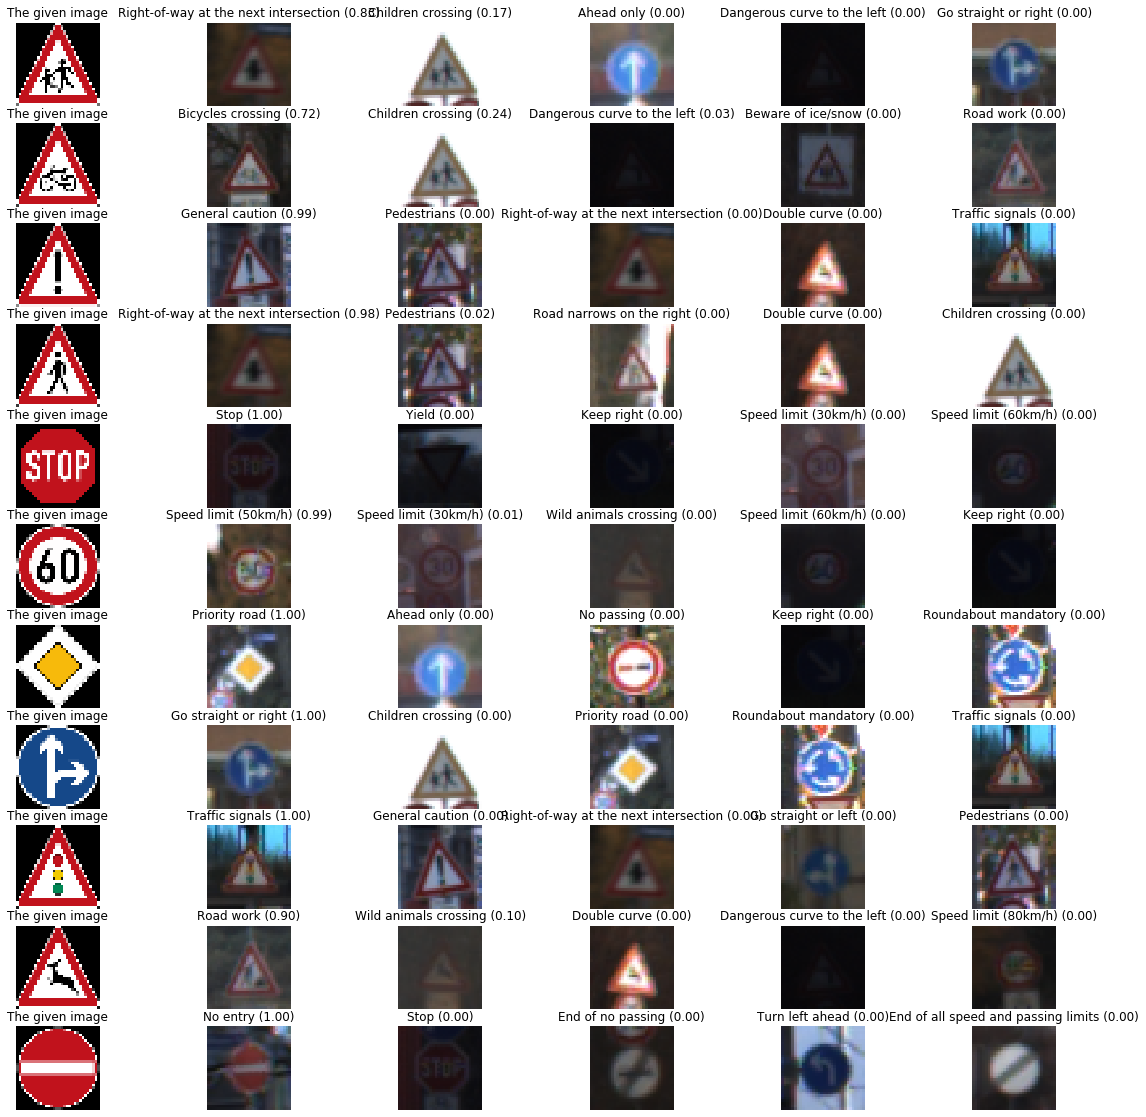

In [31]:
explore_topkv(my_images, pd)